In [90]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn import metrics
from sklearn.svm import LinearSVC, SVC
from sklearn.model_selection import KFold
from sklearn import metrics


In [91]:
csv_data = pd.read_csv('database2.csv')

In [92]:
csv_data = csv_data.drop('Unnamed: 0',axis = 1)   #消除第0行

In [93]:

label_name = {
    0:'success',
    1:'fail',
    2:'noExtusion'
}

csv_data['label'] = csv_data['label'].map(label_name)   #將label的0 1 2置換成列印狀態
csv_data


,0,1,2,3,4,5,6,7,8,9,...,135,136,137,138,139,140,141,142,143,label
0,0.444063,0.036914,0.054677,0.023335,0.070880,0.085737,0.014119,0.006116,0.444063,0.444063,...,0.079485,0.090765,0.114299,0.018888,0.040074,0.069765,0.178182,0.245363,0.119248,success
1,0.454810,0.007934,0.013114,0.035291,0.092743,0.048458,0.014482,0.006121,0.454810,0.454810,...,0.087816,0.164690,0.148902,0.065512,0.036474,0.116183,0.231543,0.153230,0.118731,success
2,0.449740,0.016068,0.031380,0.049523,0.050638,0.056034,0.039589,0.017392,0.449740,0.449740,...,0.142515,0.085284,0.094300,0.049038,0.096485,0.096112,0.189380,0.199613,0.116932,success
3,0.452308,0.003589,0.007422,0.049267,0.107743,0.042343,0.007986,0.002101,0.452308,0.452308,...,0.124520,0.160884,0.120655,0.114212,0.060669,0.128330,0.139216,0.168510,0.132645,success
4,0.402234,0.093548,0.235625,0.039485,0.036178,0.031803,0.040292,0.028391,0.402234,0.402234,...,0.250909,0.158331,0.065201,0.053144,0.116564,0.197724,0.093178,0.106081,0.283997,success
5,0.445816,0.016792,0.019524,0.049100,0.120731,0.042616,0.004973,0.008101,0.445816,0.445816,...,0.148019,0.087069,0.090303,0.085717,0.085609,0.140627,0.181312,0.148626,0.120781,success
6,0.432625,0.076960,0.087284,0.023937,0.055522,0.076192,0.020203,0.014194,0.432625,0.432625,...,0.109630,0.139604,0.083238,0.013313,0.041299,0.102469,0.280667,0.134302,0.128339,success
7,0.412829,0.047402,0.097123,0.049815,0.070938,0.066587,0.032602,0.028781,0.412829,0.412829,...,0.067186,0.135504,0.114309,0.101579,0.137030,0.153855,0.140311,0.278920,0.258237,success
8,0.043024,0.046891,0.195151,0.133714,0.119128,0.140559,0.174758,0.177190,0.110818,0.104138,...,0.257945,0.211101,0.202614,0.188733,0.209298,0.137798,0.101096,0.128527,0.205613,success
9,0.056326,0.105865,0.142223,0.140999,0.141001,0.146119,0.229365,0.175563,0.089769,0.049281,...,0.191443,0.226494,0.317821,0.225870,0.111751,0.115174,0.191585,0.205092,0.204157,success


###  進行validation 將資料分為五等分    其中四等拿來train 一等拿來test  ,故可訓練出五種分類器

In [94]:
k_fold = KFold(n_splits=5, shuffle=True, random_state=0)
model = SVC(C = 1.0 ,kernel = 'rbf' ,random_state=0)
Features = csv_data.drop('label',axis=1)
Label = csv_data['label']

In [95]:
accuracies = []
confmats = []
for train_index, test_index in k_fold.split(Label):
    #print(np.shape(test_index))
    #print(np.shape(train_index))
    trained = model.fit(Features.loc[train_index].values, Label.loc[train_index].values)
    X_test = Features.loc[test_index].values
    y_test = Label.loc[test_index].values
    accuracies.append(trained.score(X_test, y_test))
    y_pred = model.predict(X_test)
    confmats.append(metrics.confusion_matrix(y_test, y_pred))
    

In [96]:
accuracies  #五個模型的準確度

[0.8235294117647058,
 0.8171122994652407,
 0.8074866310160428,
 0.7933618843683083,
 0.80406852248394]

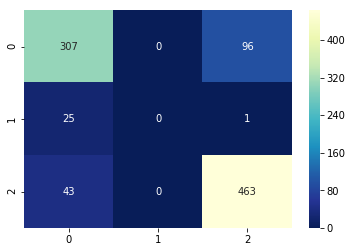

In [97]:
sns.heatmap(confmats[0], cmap="YlGnBu_r", annot=True, fmt="d")